<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
import numpy as np

# Функция для вычисления суммы произведений матриц и векторов
def sum_prod(matrices, vectors):
    # Проверяем, что количество матриц и векторов равно
    if len(matrices) != len(vectors):
        raise ValueError("Количество матриц и векторов должно быть одинаковым.")
    
    # Создаем нулевой вектор для хранения результата
    result = np.zeros_like(vectors[0])

    # Перебираем матрицы и соответствующие векторы
    for matrix, vector in zip(matrices, vectors):
        # Добавляем произведение матрицы на вектор к результату
        result += np.dot(matrix, vector)
    
    return result

# тестирования
def test_sum_prod():
    # Тест1: Две матрицы и два вектора
    X = [np.array([[1, 0], [0, 1]]),  
         np.array([[2, 0], [0, 2]])]  
    V = [np.array([[1], [1]]),        
         np.array([[1], [1]])]        
    result = sum_prod(X, V)           
    expected = np.array([[3], [3]])
    assert np.array_equal(result, expected), f"Test case 1 failed: {result}"

    # Тест2: Матрицы с произвольными элементами
    X = [np.array([[1, 2], [3, 4]]),  
         np.array([[0, 1], [1, 0]])]  
    V = [np.array([[1], [2]]),        
         np.array([[2], [1]])]        
    result = sum_prod(X, V)           
    expected = np.array([[6], [13]])
    assert np.array_equal(result, expected), f"Test case 2 failed: {result}"

    # Тест 3: Три единичные матрицы и три нулевых вектора
    X = [np.eye(3)] * 3               
    V = [np.zeros((3, 1))] * 3        
    result = sum_prod(X, V)           
    expected = np.zeros((3, 1))
    assert np.array_equal(result, expected), f"Test case 3 failed: {result}"

    # все тесты прошли успешно
    print("All test cases passed!")

test_sum_prod()


All test cases passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
import numpy as np

# Функция для бинаризации матрицы по заданному порогу
def binarize(M, threshold=0.5):
    # Возвращает матрицу, где элементы >= threshold заменяются на 1, остальные на 0
    return np.where(M >= threshold, 1, 0)

# Функция для тестирования binarize
def test_binarize():
    # Тест 1: Смешанные значения относительно порога
    M = np.array([[0.2, 0.6], [0.5, 0.8]])
    expected = np.array([[0, 1], [1, 1]])
    result = binarize(M, 0.5)
    assert np.array_equal(result, expected), f"Test case 1 failed: {result}"

    # Тест 2: Все значения ниже порога
    M = np.array([[0.1, 0.2], [0.3, 0.4]])
    expected = np.array([[0, 0], [0, 0]])
    result = binarize(M, 0.5)
    assert np.array_equal(result, expected), f"Test case 2 failed: {result}"

    # Тест 3: Все значения выше порога
    M = np.array([[0.6, 0.7], [0.8, 0.9]])
    expected = np.array([[1, 1], [1, 1]])
    result = binarize(M, 0.5)
    assert np.array_equal(result, expected), f"Test case 3 failed: {result}"

    # Тест 4: Смешанные значения с пороговым элементом
    M = np.array([[0.5, 0.7], [0.3, 0.5]])
    expected = np.array([[1, 1], [0, 1]])
    result = binarize(M, 0.5)
    assert np.array_equal(result, expected), f"Test case 4 failed: {result}"

    #  тесты прошли успешно
    print("All test cases passed!")


test_binarize()


All test cases passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
import numpy as np

# Функция для получения уникальных элементов в каждой строке матрицы
def unique_rows(mat):
    return [np.unique(row).tolist() for row in mat]

# Функция для получения уникальных элементов в каждом столбце матрицы
def unique_columns(mat):
    return [np.unique(mat[:, i]).tolist() for i in range(mat.shape[1])]

def test_unique_rows():
    # Тест 1: Строки с повторяющимися элементами
    mat = np.array([[1, 2, 2], [3, 3, 4]])
    expected = [[1, 2], [3, 4]]
    result = unique_rows(mat)
    assert np.array_equal(result, expected), f"Test case 1 failed: {result}"

    # Тест 2: Строки без повторений
    mat = np.array([[1, 2, 3], [4, 5, 6]])
    expected = [[1, 2, 3], [4, 5, 6]]
    result = unique_rows(mat)
    assert np.array_equal(result, expected), f"Test case 2 failed: {result}"

    # Тест 3: Строки с одинаковыми элементами
    mat = np.array([[7, 7, 7], [7, 7, 7]])
    expected = [[7], [7]]
    result = unique_rows(mat)
    assert np.array_equal(result, expected), f"Test case 3 failed: {result}"

    print("All test unique rows cases passed!")


def test_unique_columns():
    # Тест 1: Столбцы без повторений
    mat = np.array([[1, 2, 3], [4, 5, 6]])
    expected = [[1, 4], [2, 5], [3, 6]]
    result = unique_columns(mat)
    assert np.array_equal(result, expected), f"Test case 1 failed: {result}"

    # Тест 2: Столбцы с одинаковыми элементами
    mat = np.array([[7, 7, 7], [7, 7, 7]])
    expected = [[7], [7], [7]]
    result = unique_columns(mat)
    assert np.array_equal(result, expected), f"Test case 2 failed: {result}"

    print("All test unique columns cases passed!")

test_unique_rows()
test_unique_columns()


All test unique rows cases passed!
All test unique columns cases passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание строк: [ 0.40901351  0.23290979 -0.40099741 -0.17331496]
Дисперсия строк: [1.21351103 0.40913351 1.72437188 0.47031652]
Математическое ожидание столбцов: [ 0.6537157   0.05265806 -0.57019535  0.66122842 -0.71289318]
Дисперсия столбцов: [0.60992278 1.99316134 0.5159074  0.45468942 0.01277572]


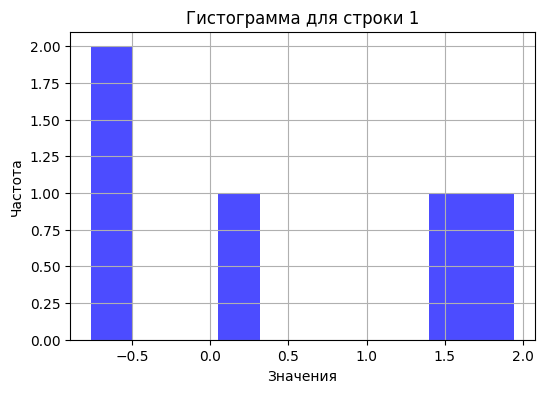

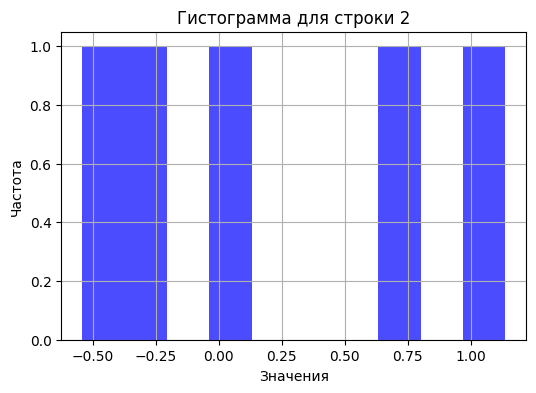

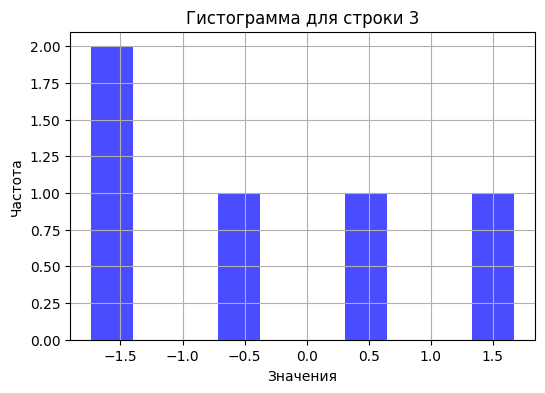

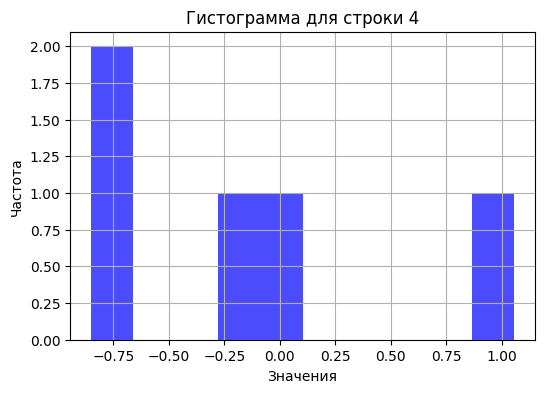

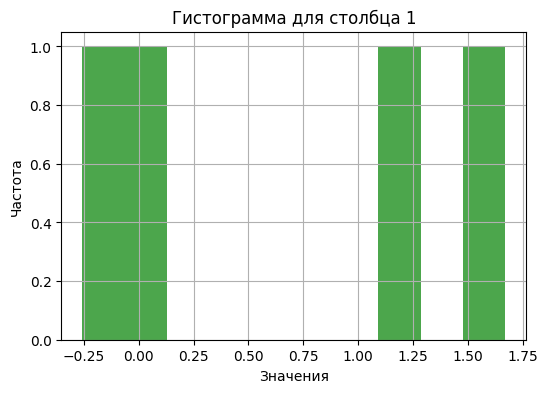

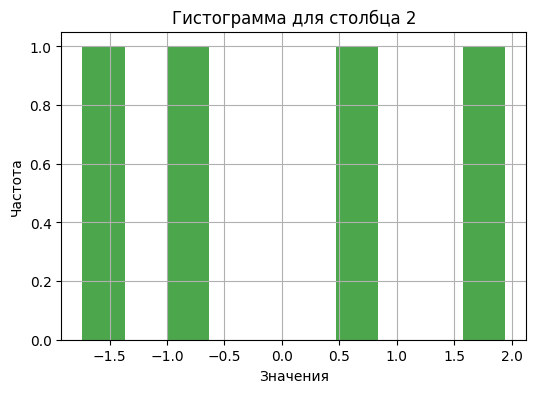

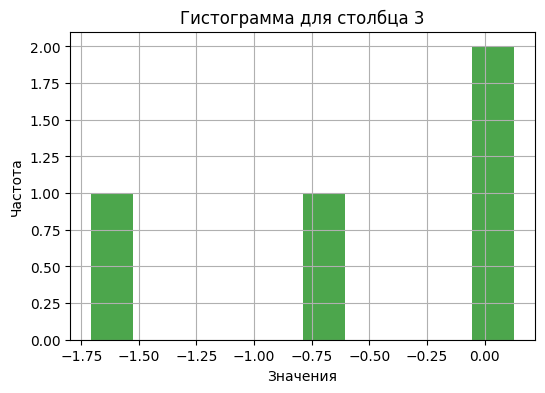

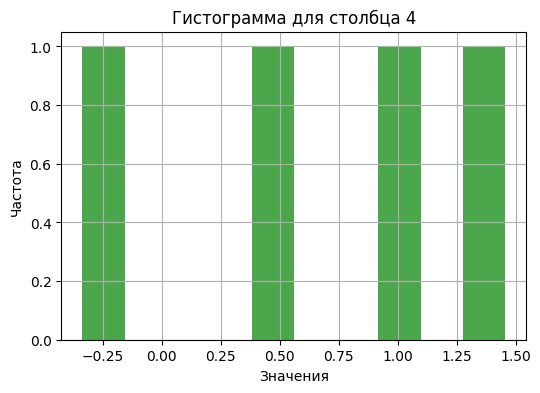

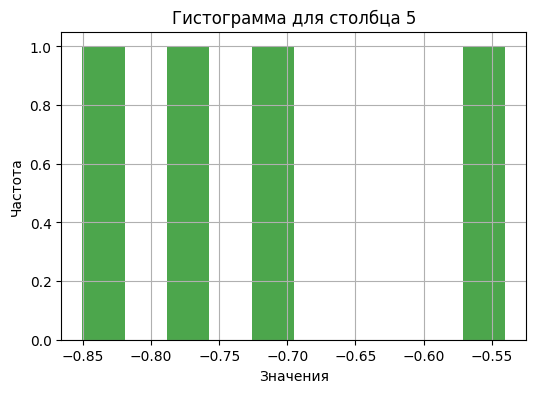

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для анализа матрицы размера m x n
def analyze_matrix(m, n):
    # Генерируем случайную матрицу с элементами из нормального распределения
    matrix = np.random.randn(m, n)

    # Вычисляем математическое ожидание и дисперсию для строк
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    # Вычисляем математическое ожидание и дисперсию для столбцов
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)

    # Выводим результаты анализа строк и столбцов
    print("Математическое ожидание строк:", row_means)
    print("Дисперсия строк:", row_variances)
    print("Математическое ожидание столбцов:", col_means)
    print("Дисперсия столбцов:", col_variances)

    # Строим гистограммы распределения для каждой строки
    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[i, :], bins=10, color='blue', alpha=0.7)
        plt.title(f'Гистограмма для строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    # Строим гистограммы распределения для каждого столбца
    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(matrix[:, j], bins=10, color='green', alpha=0.7)
        plt.title(f'Гистограмма для столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

# Запускаем анализ матрицы 4x5
analyze_matrix(4, 5)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [8]:
import numpy as np

# Функция для создания шахматной матрицы
def chess(m, n, a, b):
    # Создаем нулевую матрицу размером m x n
    matrix = np.zeros((m, n), dtype=int)

    # Заполняем матрицу значениями a и b в шахматном порядке
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a  # Элемент a для четных позиций (по сумме индексов)
            else:
                matrix[i, j] = b  # Элемент b для нечетных позиций
    
    return matrix

def test_chess():
    # Тест 1: Матрица 3x3 с элементами 1 и 0
    result = chess(3, 3, 1, 0)
    expected = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
    assert np.array_equal(result, expected), f"Test 1 failed: {result}"
    
    # Тест 2: Матрица 4x4 с элементами 5 и 10
    result = chess(4, 4, 5, 10)
    expected = np.array([[5, 10, 5, 10], [10, 5, 10, 5], [5, 10, 5, 10], [10, 5, 10, 5]])
    assert np.array_equal(result, expected), f"Test 2 failed: {result}"
    
    # Тест 3: Матрица 2x3 с элементами 7 и 3
    result = chess(2, 3, 7, 3)
    expected = np.array([[7, 3, 7], [3, 7, 3]])
    assert np.array_equal(result, expected), f"Test 3 failed: {result}"

    # Тест 4: Матрица 1x5 с элементами 9 и 4
    result = chess(1, 5, 9, 4)
    expected = np.array([[9, 4, 9, 4, 9]])
    assert np.array_equal(result, expected), f"Test 4 failed: {result}"

    print("All tests passed!")

test_chess()


All tests passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [9]:
from PIL import Image, ImageDraw

# Функция для рисования прямоугольника в изображении
def draw_rectangle(m, n, a, b, background_color, rectangle_color):
    # Создаем изображение с заданным фоном
    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)
    # Вычисляем координаты прямоугольника, чтобы он был по центру
    x0 = (m - a) // 2
    y0 = (n - b) // 2
    x1 = x0 + a
    y1 = y0 + b
    # Рисуем прямоугольник заданного цвета
    draw.rectangle([x0, y0, x1, y1], fill=rectangle_color)
    
    return img

def test_draw_rectangle():
    # Рисуем изображение 200x150 с белым фоном и красным прямоугольником 100x50
    img = draw_rectangle(200, 150, 100, 50, (255, 255, 255), (255, 0, 0))
    img.show()  
    img.save("test_rectangle.png")  # Сохраняем

test_draw_rectangle()

# Функция для рисования овала в изображении
def draw_oval(m, n, a, b, background_color, oval_color):
    # Создаем изображение с заданным фоном
    img = Image.new("RGB", (m, n), background_color)
    draw = ImageDraw.Draw(img)

    # Вычисляем координаты овала, чтобы он был по центру
    x0 = (m - a) // 2
    y0 = (n - b) // 2
    x1 = x0 + a
    y1 = y0 + b

    # Рисуем овал заданного цвета
    draw.ellipse([x0, y0, x1, y1], fill=oval_color)
    
    return img

def test_draw_oval():
    # Рисуем изображение 200x150 с белым фоном и зеленым овалом 100x50
    img = draw_oval(200, 150, 100, 50, (255, 255, 255), (0, 255, 0))
    img.show()  
    img.save("test_oval.png")  # Сохраняем

test_draw_oval()


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [10]:
import numpy as np
from scipy.signal import find_peaks

# Функция для анализа временного ряда
def analyze_time_series(series, p):
    # Математическое ожидание
    mean_value = np.mean(series)
    
    # Дисперсия
    variance_value = np.var(series)
    
    # Среднеквадратическое отклонение
    std_deviation = np.std(series)
    
    # Локальные максимумы: индексы и значения
    local_maxima_indices = find_peaks(series)[0]
    local_maxima = series[local_maxima_indices]
    
    # Локальные минимумы: индексы и значения
    local_minima_indices = find_peaks(-series)[0]
    local_minima = series[local_minima_indices]
    
    # Скользящее среднее с заданным окном `p`
    moving_average = np.convolve(series, np.ones(p) / p, mode='valid')
    
    # Возврат результата в виде словаря
    return {
        'mean': mean_value,
        'variance': variance_value,
        'std_deviation': std_deviation,
        'local_maxima': local_maxima,
        'local_maxima_indices': local_maxima_indices,
        'local_minima': local_minima,
        'local_minima_indices': local_minima_indices,
        'moving_average': moving_average
    }

# Исходные данные: временной ряд и размер окна для скользящего среднего
time_series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 3, 2, 5, 2, 1, 4])
window_size = 3

# Анализ временного ряда
result = analyze_time_series(time_series, window_size)

# Вывод 
print("Математическое ожидание:", result['mean'])
print("Дисперсия:", result['variance'])
print("Среднеквадратическое отклонение (СКО):", result['std_deviation'])
print("Локальные максимумы:", result['local_maxima'])
print("Индексы локальных максимумов:", result['local_maxima_indices'])
print("Локальные минимумы:", result['local_minima'])
print("Индексы локальных минимумов:", result['local_minima_indices'])
print("Скользящее среднее:", result['moving_average'])


Математическое ожидание: 2.7142857142857144
Дисперсия: 4.061224489795918
Среднеквадратическое отклонение (СКО): 2.015247997095126
Локальные максимумы: [7 6 3 5]
Индексы локальных максимумов: [ 2  5  8 10]
Локальные минимумы: [1 0 2 1]
Индексы локальных минимумов: [ 3  6  9 12]
Скользящее среднее: [3.66666667 3.66666667 3.33333333 3.         2.66666667 2.33333333
 1.33333333 2.         3.33333333 3.         2.66666667 2.33333333]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [11]:
import numpy as np

# Функция для выполнения one-hot-enconding
def one_hot_encoding(class_vector):
    # Находим количество классов 
    num_classes = np.max(class_vector) + 1
    
    # Создаем матрицу нулей размером 
    one_hot_matrix = np.zeros((len(class_vector), num_classes), dtype=int)
    
    # Для каждого элемента устанавливаем соответствующий индекс в 1
    one_hot_matrix[np.arange(len(class_vector)), class_vector] = 1
    
    return one_hot_matrix


class_vector = np.array([0, 2, 3, 0])  # Входной вектор классов
one_hot_result = one_hot_encoding(class_vector)  # Результат one-hot enconding

# Вывод результата
print("One-hot encoding:\n", one_hot_result)


One-hot encoding:
 [[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
